In [1]:
#Importing the required packages to perform the given tasks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# question1 read the csv file and print head and datatypes of column

df= pd.read_csv("/content/CC GENERAL.csv")

print(df.head())
print(df.dtypes)

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [5]:
# drop customer id as it is string
df.drop('CUST_ID', axis = 1, inplace = True)
# filling null values with mean for pca
df.fillna(df.mean(), inplace = True)

In [7]:
print("shape of the dataframe before pca")
print(df.shape)

shape of the dataframe before pca
(8950, 17)


In [8]:
#using kmeans on data before pca
nclusters = 2
km = KMeans(n_clusters=nclusters)
km.fit(df)

y_cluster_kmeans = km.predict(df)

score = metrics.silhouette_score(df, y_cluster_kmeans)
print('Silhoutte score without PCA:',score)

Silhoutte score without PCA: 0.511639269641848


In [9]:
# a.Apply PCA on CC dataset
#a. Apply PCA on CC dataset

pca = PCA(2)
x_pca = pca.fit_transform(df)
df2 = pd.DataFrame(data=x_pca)
df2.head()

,0,1
0,-4326.383956,921.566884
1,4118.916676,-2432.846347
2,1497.907660,-1997.578692
3,1394.548556,-1488.743450
4,-3743.351874,757.342659


In [10]:
#Applying  k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?

nclusters = 2
km = KMeans(n_clusters=nclusters)
km.fit(df2)


KMeans(n_clusters=2)

In [11]:
y_cluster_kmeans = km.predict(df2)

score = metrics.silhouette_score(df2, y_cluster_kmeans)
print('Silhoutte score for PCA:',score)

Silhoutte score for PCA: 0.598048195068687


In [ ]:
# as u can see the result has been improved

In [12]:
#Apply scaling on the dataset 
print(df)
scaler = StandardScaler()
scaler.fit(df)
x_scaler = scaler.transform(df)

#Apply PCA with k value as 2 again

pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
print(df2)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

In [13]:
#Apply k-means on the scaled PCA output
nclusters = 2
km = KMeans(n_clusters=nclusters)
km.fit(df2)
y_cluster_kmeans = km.predict(df2)
score = metrics.silhouette_score(df2, y_cluster_kmeans)
print('Silhoutte score for scaled=pca=keans:',score)

Silhoutte score for scaled=pca=keans: 0.46475550878313043


In [ ]:
# for me the silhoutte score has decreased 

In [15]:
#question-2
#Load the dataset

df=pd.read_csv('/content/pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [16]:
# scaling the data
scaler = StandardScaler()
X = df.drop('class',axis=1).values
y = df['class'].values


In [18]:
# apply pca with componets=3
X_Scale = scaler.fit_transform(X)
pca2 = PCA(n_components=3)
principalComponents = pca2.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,class
0,-10.047372,1.471077,-6.846404,1
1,-10.637725,1.583750,-6.830974,1
2,-13.516185,-1.253542,-6.818698,1
3,-9.155083,8.833599,15.290906,1
4,-6.764470,4.611462,15.637120,1


In [19]:
#Apply SVM classifier

svm = SVC(kernel='linear') 
x = finalDf.drop('class',axis=1).values
y = finalDf['class'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)
accuracy_score(y_test, y_pred)
print("SVM accuracy =", accuracy_score(y_test, y_pred))

SVM accuracy = 0.8026315789473685


In [20]:
#Classification report for the above classifier

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.37      0.48        38
           1       0.82      0.95      0.88       114

    accuracy                           0.80       152
   macro avg       0.76      0.66      0.68       152
weighted avg       0.79      0.80      0.78       152



In [30]:
#question 3:
#Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data tok=2.
df=pd.read_csv("/content/Iris.csv")
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [31]:
# 3Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data tok=2.

scale = StandardScaler()
X_train_std = scale.fit_transform(df.iloc[:,:-1].values)
#Label encoding the species column
encoding = LabelEncoder()
y = encoding.fit_transform(df['Species'].values)

lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train_std,y)

data=pd.DataFrame(X_train)

data['class']=y

data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-10.036763,-0.451330,0
1,-9.172930,-1.477234,0
2,-9.480989,-0.979693,0
3,-8.818119,-1.408602,0
4,-9.960200,-0.112546,0


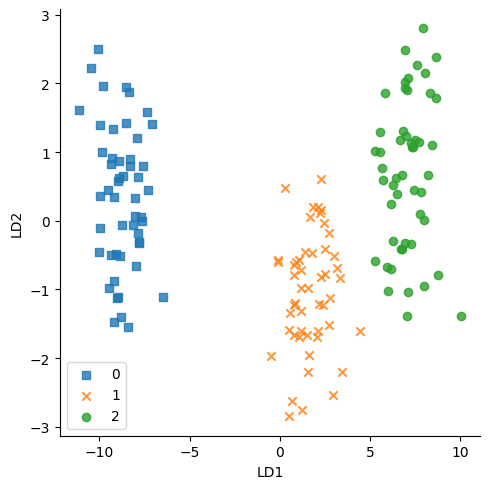

In [32]:
markers = ['s', 'x', 'o']
colors = ['y', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend()
plt.show()

In [ ]:
#Briefly identify the difference between PCA and LDA
# pca is unsupervised and lda is supervised
#If you’re working with labeled data and your goal is to find a low-dimensional representation then use lda otherwise pca
# if we want to retain as much data as possible but want to decrease the number of columns then pca is better
#This means that PCA finds directions of maximum variance regardless of class labels while LDA finds directions of maximum class separability.
#PCA performs better in case where number of samples per class is less. Whereas LDA works better with large dataset
#having multiple classes; class separability is an important factor while reducing dimensionality.